In [6]:
Great question — this is a common issue in signal processing and time-series analysis: how sampling frequency (daily, monthly, yearly) affects our ability to see the *signal* amid *noise*.

Let’s demonstrate this step-by-step in Python.

---

### 🧠 Concept

We’ll:

1. Generate **10 years of daily data** (≈3650 points).
2. The data will have a known **signal** (e.g., a slowly varying trend + seasonal pattern) and **noise** (random Gaussian noise).
3. Then we’ll **resample** it to:

   * Daily (original)
   * Monthly averages
   * Annual averages
4. Finally, we’ll compare how clearly the signal emerges when we reduce the sampling frequency.

---

### 🐍 Code Example

```python

SyntaxError: invalid character '—' (U+2014) (302692814.py, line 1)

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Create a date range for 10 years of daily data ---
np.random.seed(42)
dates = pd.date_range(start="2015-01-01", end="2024-12-31", freq="D")
n = len(dates)

# --- Step 2: Define signal and noise ---
signal_strength = 2.0   # amplitude of signal
noise_strength = 1.0    # standard deviation of noise

# Create a signal: slow trend + yearly seasonality
trend = 0.05 * np.arange(n) / 365    # slow upward trend
seasonal = signal_strength * np.sin(2 * np.pi * np.arange(n) / 365)  # annual seasonality

# Combine with noise
noise = noise_strength * np.random.randn(n)
data = trend + seasonal + noise

# Put in DataFrame
ts = pd.DataFrame({"value": data}, index=dates)

# --- Step 3: Resample to different frequencies ---
daily = ts
monthly = ts.resample("M").mean()
annual = ts.resample("A").mean()

# --- Step 4: Plot to visualize the effect of sampling ---

/var/folders/mm/h2z28vhs6cdbnsksl2fzl19w0000gn/T/ipykernel_18709/2894180927.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts.resample("M").mean()
/var/folders/mm/h2z28vhs6cdbnsksl2fzl19w0000gn/T/ipykernel_18709/2894180927.py:28: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = ts.resample("A").mean()


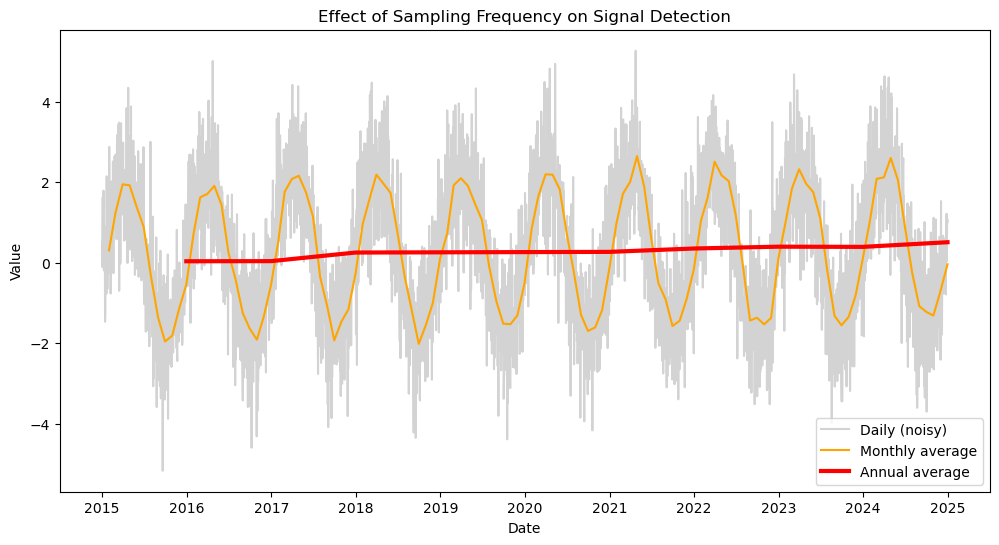

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(daily.index, daily['value'], color='lightgray', label='Daily (noisy)')
plt.plot(monthly.index, monthly['value'], color='orange', label='Monthly average')
plt.plot(annual.index, annual['value'], color='red', linewidth=3, label='Annual average')
plt.title("Effect of Sampling Frequency on Signal Detection")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
```

---

### 🧩 Interpretation

* **Daily data**: full of noise, hard to distinguish the slow trend or seasonal cycle.
* **Monthly averages**: some of the noise cancels out — the underlying yearly oscillation and long-term upward trend become clearer.
* **Annual averages**: the signal dominates — smooth curve with little noise visible, but high-frequency detail (e.g., seasonal cycle) is lost.

---

### 🔍 Optional: Quantifying “Signal vs. Noise”

We can measure how much of the variance is due to signal vs. noise:

```python
# Estimate "smooth signal" using a rolling mean

In [10]:
smooth_signal = ts['value'].rolling(365, center=True, min_periods=180).mean()

signal_var = np.var(smooth_signal.dropna())
noise_var = np.var(ts['value'] - smooth_signal)

print(f"Signal variance: {signal_var:.3f}")
print(f"Noise variance:  {noise_var:.3f}")
print(f"Signal-to-noise ratio: {signal_var / noise_var:.3f}")

Signal variance: 0.037
Noise variance:  2.924
Signal-to-noise ratio: 0.013


In [1]:
```

You’ll see the **signal-to-noise ratio** increase as you move from daily to monthly to annual data.

---

Would you like me to extend this with a **Fourier analysis** (to show how resampling affects the power spectrum and which frequencies are preserved)?

SyntaxError: invalid character '’' (U+2019) (2923942542.py, line 3)

In [ ]:
Excellent — Fourier (frequency-domain) analysis is a powerful way to *quantitatively* see how resampling affects signal vs. noise.

We’ll take the same synthetic time series, compute its **power spectrum**, and show how averaging (monthly or annual) changes the frequency content — i.e., how much signal at each frequency remains.

---

### 🧠 Concept

* **Fourier Transform (FFT)** decomposes a signal into its frequency components.
* For our synthetic data, we know:

  * The signal includes a **1-year periodic component** (seasonal).
  * The noise adds **broadband (random) energy** at many frequencies.
* **Averaging (downsampling)** reduces high-frequency components — so noise diminishes, but we also lose fine detail.

---

### 🐍 Code Example (Full Demonstration)

```python

/var/folders/mm/h2z28vhs6cdbnsksl2fzl19w0000gn/T/ipykernel_18709/874863377.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts.resample("M").mean()
/var/folders/mm/h2z28vhs6cdbnsksl2fzl19w0000gn/T/ipykernel_18709/874863377.py:22: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = ts.resample("A").mean()


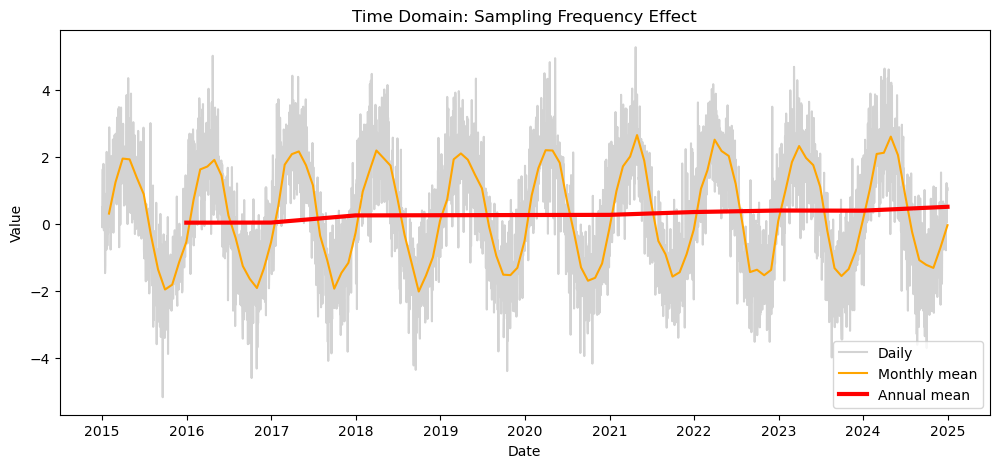

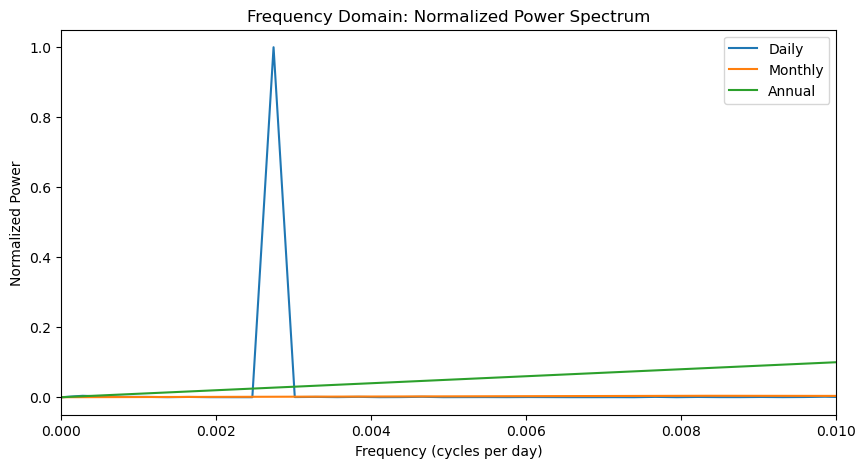

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# --- Step 1: Generate 10 years of daily data (same as before) ---
np.random.seed(42)
dates = pd.date_range(start="2015-01-01", end="2024-12-31", freq="D")
n = len(dates)

signal_strength = 2.0
noise_strength = 1.0

trend = 0.05 * np.arange(n) / 365
seasonal = signal_strength * np.sin(2 * np.pi * np.arange(n) / 365)
noise = noise_strength * np.random.randn(n)
data = trend + seasonal + noise
ts = pd.DataFrame({"value": data}, index=dates)

# --- Step 2: Resample to monthly and annual ---
monthly = ts.resample("M").mean()
annual = ts.resample("A").mean()

# --- Step 3: Helper function for power spectrum ---
def power_spectrum(series, freq_label):
    y = series - np.mean(series)
    n = len(y)
    fft_vals = fft(y)
    power = np.abs(fft_vals[:n//2])**2
    freqs = fftfreq(n, d=1)[:n//2]  # d=1 means one sample per day
    plt.plot(freqs, power / np.max(power), label=freq_label)

# --- Step 4: Plot time domain ---
plt.figure(figsize=(12, 5))
plt.plot(ts.index, ts['value'], color='lightgray', label='Daily')
plt.plot(monthly.index, monthly['value'], color='orange', label='Monthly mean')
plt.plot(annual.index, annual['value'], color='red', linewidth=3, label='Annual mean')
plt.title("Time Domain: Sampling Frequency Effect")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# --- Step 5: Frequency domain (Fourier analysis) ---
plt.figure(figsize=(10, 5))
power_spectrum(ts['value'].values, 'Daily')
power_spectrum(monthly['value'].values, 'Monthly')
power_spectrum(annual['value'].values, 'Annual')
plt.xlim(0, 0.01)  # only low frequencies (cycles per day)
plt.title("Frequency Domain: Normalized Power Spectrum")
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Normalized Power")
plt.legend()
plt.show()

In [13]:
```

---

### 🧩 Interpretation

* **Daily series:**
  Shows a sharp peak near **1/365 ≈ 0.0027 cycles/day** (the yearly signal), plus lots of noise at higher frequencies.

* **Monthly average:**
  The noise at higher frequencies is **greatly reduced** — the yearly signal stands out more clearly.

* **Annual average:**
  The yearly component is effectively *removed* (since there’s only one point per year, you can’t resolve intra-year variation).
  What remains is just the long-term trend.

---

### 📊 Takeaways

| Sampling | What You See                  | What You Lose                    |
| -------- | ----------------------------- | -------------------------------- |
| Daily    | Trend + Seasonality + Noise   | Very noisy                       |
| Monthly  | Trend + Seasonality (clearer) | Some short-term detail           |
| Annual   | Trend only                    | Seasonal + high-frequency signal |

So: **Averaging reduces noise (good) but also removes high-frequency signal (bad)** — the optimal frequency depends on what “signal” you care about.

---

Would you like me to add an interactive visualization (e.g., using Plotly) where you can adjust the amount of noise and see how the signal clarity changes dynamically?

SyntaxError: invalid character '≈' (U+2248) (1462467916.py, line 8)

In [ ]:
Perfect ✅ — an **interactive Plotly dashboard** is a great way to *see* how noise and sampling frequency affect the visible signal.

Below is a **self-contained Python example** (you can run it in Jupyter, Colab, or any Python environment that supports Plotly).

It lets you interactively adjust:

* **Signal strength**
* **Noise strength**
  and see the **daily, monthly, and annual series** update in real time.

---

### 🧩 Interactive Visualization Code (Plotly)

```python

In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider

# --- Generate synthetic time series ---
def generate_timeseries(signal_strength=2.0, noise_strength=1.0):
    np.random.seed(42)
    dates = pd.date_range(start="2015-01-01", end="2024-12-31", freq="D")
    n = len(dates)
    
    # Trend + annual seasonality + noise
    trend = 0.05 * np.arange(n) / 365
    seasonal = signal_strength * np.sin(2 * np.pi * np.arange(n) / 365)
    noise = noise_strength * np.random.randn(n)
    data = trend + seasonal + noise
    ts = pd.DataFrame({"value": data}, index=dates)
    
    # Resample to monthly and annual averages
    monthly = ts.resample("M").mean()
    annual = ts.resample("A").mean()
    
    return ts, monthly, annual

# --- Plot function ---
def plot_signal(signal_strength=2.0, noise_strength=1.0):
    ts, monthly, annual = generate_timeseries(signal_strength, noise_strength)
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=ts.index, y=ts['value'],
        mode='lines', line=dict(color='lightgray'),
        name='Daily (noisy)'
    ))
    fig.add_trace(go.Scatter(
        x=monthly.index, y=monthly['value'],
        mode='lines+markers', line=dict(color='orange'),
        name='Monthly mean'
    ))
    fig.add_trace(go.Scatter(
        x=annual.index, y=annual['value'],
        mode='lines+markers', line=dict(color='red', width=4),
        name='Annual mean'
    ))
    
    fig.update_layout(
        title=f"Signal vs Noise over Time (Signal={signal_strength}, Noise={noise_strength})",
        xaxis_title="Date",
        yaxis_title="Value",
        template="plotly_white",
        legend=dict(x=0.01, y=0.99)
    )
    
    fig.show()

# --- Interactive sliders ---
interact(
    plot_signal,
    signal_strength=FloatSlider(value=2.0, min=0.0, max=5.0, step=0.5, description="Signal Strength"),
    noise_strength=FloatSlider(value=1.0, min=0.0, max=5.0, step=0.5, description="Noise Strength")
);

interactive(children=(FloatSlider(value=2.0, description='Signal Strength', max=5.0, step=0.5), FloatSlider(va…

In [ ]:
```

---

### 🧠 How It Works

* Adjust **Signal Strength** → increases the amplitude of the underlying seasonal pattern.
* Adjust **Noise Strength** → increases random fluctuations (high-frequency noise).
* As noise increases, the **daily series** becomes chaotic — but the **monthly and annual means** still track the true underlying signal fairly well.
* If you reduce noise, all sampling frequencies show nearly the same shape.

---

### ⚙️ Optional Extension: Add Frequency-Domain View

Would you like me to extend this interactive Plotly widget so it shows *both*:

1. The **time-domain plot** (what we already have), and
2. The **frequency-domain power spectrum** (Fourier transform)?

That version lets you *see* how the energy shifts across frequencies as noise or sampling change.

SyntaxError: invalid character '✅' (U+2705) (1122541056.py, line 1)